In [1]:
import pandas as pd
import numpy as np
import os

# Ablation Search on clean dataset

## Forward feature selection

In [2]:
path = os.path.join(os.getcwd(),"Scores","Older score csv files","Forward_AblationClean_new_lr.csv")

for_clean_df = pd.read_csv(path,sep=";")


In [3]:
for_clean_df[for_clean_df.Model_id == "AblationClean_only_spec_augment"]

,Time,Model_id,Reference,WER,CER,Transcript,Augmentation_list,Best_epoch,Total_epoch
1200,"30/04/2020, 23:31:13",AblationClean_only_spec_augment,i forvejen udgør den særlige gruppe af erhverv...,0.166667,0.033613,i forvejen udgør den særlige gruppe af erhverv...,['spec_augment'],15,20
1201,"30/04/2020, 23:31:13",AblationClean_only_spec_augment,det vigtige er at fjerne et hvert præg af elit...,0.333333,0.025974,det vigtige er at fjerne ethvert præg afelite ...,['spec_augment'],15,20
1202,"30/04/2020, 23:31:13",AblationClean_only_spec_augment,jo mere de taler offentligt jo mindre vil der ...,0.076923,0.044118,jo mere de taler offentligt med mindre vil der...,['spec_augment'],15,20
1203,"30/04/2020, 23:31:13",AblationClean_only_spec_augment,hvem ved måske ønsker han at lære at læse,0.111111,0.024390,vem ved måske ønsker han at lære at læse,['spec_augment'],15,20
1204,"30/04/2020, 23:31:13",AblationClean_only_spec_augment,varmen fortsætter men luftfugtigheden får den ...,0.090909,0.027397,varmen fortsætter men luftfugtigheden får den ...,['spec_augment'],15,20
...,...,...,...,...,...,...,...,...,...
1395,"01/05/2020, 00:14:16",AblationClean_only_spec_augment,einar kornerup as,1.000000,0.235294,ejn oer kornerup af,['spec_augment'],20,20
1396,"01/05/2020, 00:14:16",AblationClean_only_spec_augment,der er da et stykke tid endnu,0.428571,0.206897,det er der et stykke tid nu,['spec_augment'],20,20
1397,"01/05/2020, 00:14:16",AblationClean_only_spec_augment,det er lige noget der passer mig,0.000000,0.000000,det er lige noget der passer mig,['spec_augment'],20,20
1398,"01/05/2020, 00:14:16",AblationClean_only_spec_augment,men det er jo kun et par måneder siden vi begy...,0.368421,0.084211,men det jor kun et par måneder siden ve begynt...,['spec_augment'],20,20


In [4]:
for_means_clean = for_clean_df.groupby("Model_id").mean()[["WER","CER","Best_epoch"]]

In [5]:
for_means_clean

,WER,CER,Best_epoch
Model_id,,,
AblationClean_Baseline,0.265594,0.077737,18.345
AblationClean_only_add_wn,0.276179,0.078531,11.340
AblationClean_only_room_reverb,0.239192,0.069375,11.300
AblationClean_only_shift_perturb,0.258659,0.073179,14.320
AblationClean_only_spec_augment,0.250642,0.073460,15.310
AblationClean_only_speed_perturb,0.263697,0.075627,10.345
AblationClean_only_tempo_perturb,0.262325,0.076816,8.015
AblationClean_only_volume_perturb,0.262833,0.076236,11.295


In [6]:
forward_models = ['AblationClean_Baseline','AblationClean_only_add_wn','AblationClean_only_room_reverb',
                   'AblationClean_only_shift_perturb','AblationClean_only_spec_augment',
                  'AblationClean_only_speed_perturb','AblationClean_only_tempo_perturb','AblationClean_only_volume_perturb']

for_means_clean = for_means_clean.loc[forward_models]

for_means_clean = for_means_clean.sort_values(by="WER")

In [7]:
round(for_means_clean*100,2)

,WER,CER,Best_epoch
Model_id,,,
AblationClean_only_room_reverb,23.92,6.94,1130.0
AblationClean_only_spec_augment,25.06,7.35,1531.0
AblationClean_only_shift_perturb,25.87,7.32,1432.0
AblationClean_only_tempo_perturb,26.23,7.68,801.5
AblationClean_only_volume_perturb,26.28,7.62,1129.5
AblationClean_only_speed_perturb,26.37,7.56,1034.5
AblationClean_Baseline,26.56,7.77,1834.5
AblationClean_only_add_wn,27.62,7.85,1134.0


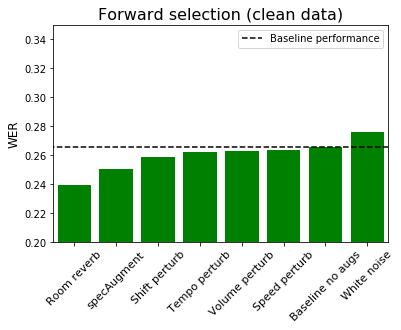

In [8]:
import matplotlib.pyplot as plt

xticks = ["Room reverb","specAugment","Shift perturb","Tempo perturb",
            "Volume perturb","Speed perturb","Baseline no augs","White noise"]

plt.title("Forward selection (clean data)",fontsize=16)
plt.bar(xticks,for_means_clean.WER,color="green")
plt.hlines(0.265594,-1,8,linestyles="dashed",label="Baseline performance")
plt.legend()
plt.xticks(rotation=45)
plt.ylabel("WER",fontsize=12)
plt.xticks(rotation=45,fontsize=11)
plt.ylim(0.20,0.35)
plt.xlim(-.5,7.5)

plt.show()


### CI for forward ablation

In [9]:
models = for_clean_df.Model_id.unique()

for i,m in enumerate(models):
    if i == 0:
        temp = for_clean_df[for_clean_df.Model_id.isin([m])][["Reference","WER"]]
        temp = temp.rename(columns={"WER":f'{m}'})  
        
        for_ref_df = temp.copy()
        
    else:
        temp = for_clean_df[for_clean_df.Model_id.isin([m])][["Reference","WER"]]
        temp = temp.rename(columns={"WER":m}) 
        
        for_ref_df = for_ref_df.merge(temp,on=["Reference"])

for_ref_df.sample(3)

,Reference,AblationClean_Baseline,AblationClean_only_tempo_perturb,AblationClean_only_room_reverb,AblationClean_only_volume_perturb,AblationClean_only_add_wn,AblationClean_only_shift_perturb,AblationClean_only_spec_augment,AblationClean_only_speed_perturb
61,eksemplerne er efterhånden talrige og meget gode,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000
68,i omkring et tusinde meters højde på en kringl...,0.304348,0.260870,0.217391,0.347826,0.304348,0.347826,0.260870,0.347826
67,de kommende år vil byde på en række opgaver in...,0.086957,0.130435,0.086957,0.086957,0.086957,0.043478,0.130435,0.086957


In [10]:
for_ref_df = for_ref_df[forward_models]

dif_df = for_ref_df.subtract(for_ref_df["AblationClean_Baseline"],axis="rows")[forward_models[1:]]

dif_df.sample(3)

,AblationClean_only_add_wn,AblationClean_only_room_reverb,AblationClean_only_shift_perturb,AblationClean_only_spec_augment,AblationClean_only_speed_perturb,AblationClean_only_tempo_perturb,AblationClean_only_volume_perturb
170,0.000000,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909
101,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
51,0.222222,0.000000,0.111111,0.000000,0.111111,0.222222,0.222222


In [11]:
m_for_clean = dif_df.mean()
s_for_clean = dif_df.std()
n_for_clean = len(dif_df)

In [12]:
m_for_clean

AblationClean_only_add_wn            0.010585
AblationClean_only_room_reverb      -0.026402
AblationClean_only_shift_perturb    -0.006935
AblationClean_only_spec_augment     -0.014952
AblationClean_only_speed_perturb    -0.001897
AblationClean_only_tempo_perturb    -0.003269
AblationClean_only_volume_perturb   -0.002761
dtype: float64

In [13]:
from scipy.stats import  t
confidence=0.05

h = t.ppf(1-(confidence/2), n_for_clean - 1) * (s_for_clean/(np.sqrt(n_for_clean)))

start = m_for_clean - h
end = m_for_clean + h

start *= 100

end *= 100

CIs_forwards = list(zip(forward_models[1:],start,end))

[print(f'{a}: ({b}) - ({c})') for a,b,c in CIs_forwards]

AblationClean_only_add_wn: (-0.6890427266275941) - (2.806054381123769)
AblationClean_only_room_reverb: (-4.297454151899077) - (-0.982939593315638)
AblationClean_only_shift_perturb: (-1.9254877250953095) - (0.5385196952564354)
AblationClean_only_spec_augment: (-3.438939048745209) - (0.44849983815994937)
AblationClean_only_speed_perturb: (-1.64767511514055) - (1.2682226017097085)
AblationClean_only_tempo_perturb: (-2.068770450707906) - (1.4149221320308762)
AblationClean_only_volume_perturb: (-1.6022588425285078) - (1.050072956519093)


[None, None, None, None, None, None, None]

# Backward feature selection for clean data

In [14]:
path = os.path.join(os.getcwd(),"Scores","Older score csv files","Backward_AblationClean_new_lr.csv")

back_clean_df = pd.read_csv(path,sep=";")

In [15]:
back_clean_df

,Time,Model_id,Reference,WER,CER,Transcript,Augmentation_list,Best_epoch,Total_epoch
0,"02/05/2020, 15:29:58",AblationClean_Baseline_allAugs,i forvejen udgør den særlige gruppe af erhverv...,0.166667,0.050420,i forvejen udgør den særlige gruppe af erhverv...,"['tempo_perturb', 'room_reverb', 'volume_pertu...",17,20
1,"02/05/2020, 15:29:58",AblationClean_Baseline_allAugs,det vigtige er at fjerne et hvert præg af elit...,0.266667,0.025974,det vigtige er at fjerne ethvert præg af elite...,"['tempo_perturb', 'room_reverb', 'volume_pertu...",17,20
2,"02/05/2020, 15:29:58",AblationClean_Baseline_allAugs,jo mere de taler offentligt jo mindre vil der ...,0.076923,0.044118,jo mere de taler offentligt med mindre vil der...,"['tempo_perturb', 'room_reverb', 'volume_pertu...",17,20
3,"02/05/2020, 15:29:58",AblationClean_Baseline_allAugs,hvem ved måske ønsker han at lære at læse,0.333333,0.121951,ven ved måske ønske han at lære at kase,"['tempo_perturb', 'room_reverb', 'volume_pertu...",17,20
4,"02/05/2020, 15:29:58",AblationClean_Baseline_allAugs,varmen fortsætter men luftfugtigheden får den ...,0.181818,0.041096,varmen fortsætter men lutfygtigheden får den t...,"['tempo_perturb', 'room_reverb', 'volume_pertu...",17,20
...,...,...,...,...,...,...,...,...,...
1595,"03/05/2020, 00:18:19",AblationClean_no_speed_perturb,einar kornerup as,2.000000,0.529412,hegen or korne rube af et,"['tempo_perturb', 'room_reverb', 'volume_pertu...",19,20
1596,"03/05/2020, 00:18:19",AblationClean_no_speed_perturb,der er da et stykke tid endnu,0.571429,0.172414,det er der et stykke tidn nu,"['tempo_perturb', 'room_reverb', 'volume_pertu...",19,20
1597,"03/05/2020, 00:18:19",AblationClean_no_speed_perturb,det er lige noget der passer mig,0.000000,0.000000,det er lige noget der passer mig,"['tempo_perturb', 'room_reverb', 'volume_pertu...",19,20
1598,"03/05/2020, 00:18:19",AblationClean_no_speed_perturb,men det er jo kun et par måneder siden vi begy...,0.263158,0.073684,men det ver kun et par måneder siden ve begynd...,"['tempo_perturb', 'room_reverb', 'volume_pertu...",19,20


In [16]:
back_clean_df[back_clean_df.Model_id == "AblationClean_no_room_reverb"].Augmentation_list.unique()

array(["['tempo_perturb', 'volume_perturb', 'add_wn', 'shift_perturb', 'spec_augment', 'speed_perturb']"],
      dtype=object)

In [17]:
backward_models = ['AblationClean_Baseline_allAugs','AblationClean_no_tempo_perturb','AblationClean_no_room_reverb',
                   'AblationClean_no_volume_perturb','AblationClean_no_add_wn','AblationClean_no_shift_perturb',
                   'AblationClean_no_spec_augment','AblationClean_no_speed_perturb']

back_means_clean = back_clean_df.groupby("Model_id").mean()[["WER","CER","Best_epoch"]]

back_means_clean = back_means_clean.loc[backward_models]

back_means_clean = back_means_clean.sort_values(by="WER",ascending=False)

In [18]:
round(back_means_clean*100,2)

,WER,CER,Best_epoch
Model_id,,,
AblationClean_Baseline_allAugs,30.60,8.79,1601.0
AblationClean_no_shift_perturb,30.46,8.70,1900.0
AblationClean_no_room_reverb,30.34,8.32,1833.5
AblationClean_no_volume_perturb,30.28,8.61,1700.0
AblationClean_no_speed_perturb,30.03,8.39,1933.5
AblationClean_no_spec_augment,28.67,8.33,1302.0
AblationClean_no_add_wn,28.51,7.95,1068.5
AblationClean_no_tempo_perturb,28.16,7.78,1635.5


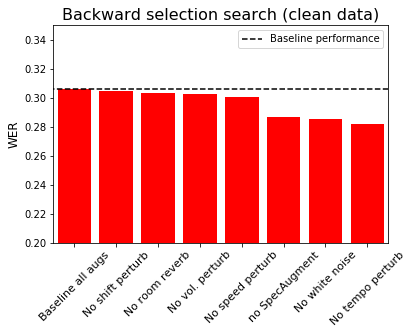

In [19]:
ticks = ["Baseline all augs",'No shift perturb',"No room reverb",'No vol. perturb',
         'No speed perturb','no SpecAugment',"No white noise","No tempo perturb"]

plt.title("Backward selection search (clean data)",fontsize=16)
plt.bar(ticks,back_means_clean.WER,color="red")
plt.hlines(0.305977,-1,8,linestyles="dashed",label="Baseline performance")
plt.legend()
plt.xticks(rotation=45)
plt.ylabel("WER",fontsize=12)
plt.xticks(rotation=45,fontsize=11)
plt.ylim(0.2,0.35)
plt.xlim(-0.5,7.5)

plt.show()

### CI for backward ablation

In [20]:
models = back_clean_df.Model_id.unique()

for i,m in enumerate(models):
    if i == 0:
        temp = back_clean_df[back_clean_df.Model_id.isin([m])][["Reference","WER"]]
        temp = temp.rename(columns={"WER":f'{m}'})  
        
        back_clean_ref_df = temp.copy()
        
    else:
        temp = back_clean_df[back_clean_df.Model_id.isin([m])][["Reference","WER"]]
        temp = temp.rename(columns={"WER":m}) 
        
        back_clean_ref_df = back_clean_ref_df.merge(temp,on=["Reference"])

back_clean_ref_df.sample(3)

,Reference,AblationClean_Baseline_allAugs,AblationClean_no_tempo_perturb,AblationClean_no_room_reverb,AblationClean_no_volume_perturb,AblationClean_no_add_wn,AblationClean_no_shift_perturb,AblationClean_no_spec_augment,AblationClean_no_speed_perturb
103,men der findes en del haver hvor man har dem i...,0.583333,0.583333,0.416667,0.666667,0.500000,0.583333,0.583333,0.583333
105,vil de have lønstyring eller en lokal og fleks...,0.200000,0.100000,0.100000,0.100000,0.200000,0.100000,0.200000,0.000000
32,det var spild af tid mente han og for at få re...,0.500000,0.458333,0.458333,0.416667,0.416667,0.375000,0.333333,0.416667


In [21]:
back_clean_ref_df = back_clean_ref_df[backward_models]

back_clean_dif_df = back_clean_ref_df.subtract(back_clean_ref_df["AblationClean_Baseline_allAugs"],axis="rows")[backward_models[1:]]

back_clean_dif_df.sample(3)

,AblationClean_no_tempo_perturb,AblationClean_no_room_reverb,AblationClean_no_volume_perturb,AblationClean_no_add_wn,AblationClean_no_shift_perturb,AblationClean_no_spec_augment,AblationClean_no_speed_perturb
146,0.000000,0.000000,0.000000,0.0,-0.090909,0.000000,0.000000
131,0.090909,0.045455,0.045455,0.0,0.090909,0.045455,0.136364
167,0.000000,0.000000,0.000000,0.0,0.000000,-0.047619,-0.047619


In [22]:
m_back_clean = back_clean_dif_df.mean()
s_back_clean = back_clean_dif_df.std()
n_back_clean = len(back_clean_dif_df)

In [23]:
s_back_clean

AblationClean_no_tempo_perturb     0.137897
AblationClean_no_room_reverb       0.142601
AblationClean_no_volume_perturb    0.137815
AblationClean_no_add_wn            0.149497
AblationClean_no_shift_perturb     0.141521
AblationClean_no_spec_augment      0.171356
AblationClean_no_speed_perturb     0.126821
dtype: float64

In [24]:
from scipy.stats import  t
confidence=0.05

h = t.ppf(1-(confidence/2), n_back_clean - 1) * (s_back_clean/(np.sqrt(n_back_clean)))

start = m_back_clean - h
end = m_back_clean + h

start *= 100
end *= 100

CIs_backward = list(zip(backward_models[1:],start,end))

[print(f'{a}: ({b}) - ({c})') for a,b,c in CIs_backward]

AblationClean_no_tempo_perturb: (-4.363074302364472) - (-0.5174518951259862)
AblationClean_no_room_reverb: (-2.246636626167369) - (1.7301805667469132)
AblationClean_no_volume_perturb: (-2.243475927141548) - (1.5998728390344885)
AblationClean_no_add_wn: (-4.168305246075975) - (0.0008099493863034796)
AblationClean_no_shift_perturb: (-2.115414964535674) - (1.8312737555031617)
AblationClean_no_spec_augment: (-4.313662439242141) - (0.465063057663221)
AblationClean_no_speed_perturb: (-2.336819319609551) - (1.1999229991070925)


[None, None, None, None, None, None, None]

# Ablation Search for Noisy Dataset

## Forward

In [25]:
path = os.path.join(os.getcwd(),"Scores",
                    "Older score csv files",
                    "For_and_backward_AblationNoisy_new_lr.csv")

df_noisy = pd.read_csv(path,sep=";")

In [26]:
means_noisy = df_noisy.groupby("Model_id").mean()[["WER","CER","Best_epoch"]]
means_noisy

,WER,CER,Best_epoch
Model_id,,,
AblationNoise_Baseline,0.504191,0.195462,11.300
AblationNoise_Baseline_allAugs,0.562042,0.206855,19.670
AblationNoise_no_add_wn,0.517725,0.198632,18.340
AblationNoise_no_room_reverb,0.561836,0.220457,17.990
AblationNoise_no_shift_perturb,0.552539,0.212756,19.335
AblationNoise_no_spec_augment,0.531265,0.202345,16.350
AblationNoise_no_speed_perturb,0.549993,0.214489,18.995
AblationNoise_no_tempo_perturb,0.525489,0.194501,16.985
AblationNoise_no_volume_perturb,0.550893,0.212449,17.675


In [27]:
forward_models = ['AblationNoise_Baseline','AblationNoise_only_add_wn','AblationNoise_only_room_reverb',
                   'AblationNoise_only_shift_perturb','AblationNoise_only_spec_augment','AblationNoise_only_speed_perturb',
                   'AblationNoise_only_tempo_perturb','AblationNoise_only_volume_perturb']

for_means_noisy = means_noisy.loc[forward_models]

for_means_noisy = for_means_noisy.sort_values(by="WER")

round(for_means_noisy*100,2)


,WER,CER,Best_epoch
Model_id,,,
AblationNoise_only_room_reverb,47.39,18.24,1300.5
AblationNoise_only_spec_augment,47.94,18.39,1933.5
AblationNoise_only_shift_perturb,48.93,18.87,1636.5
AblationNoise_only_speed_perturb,49.33,18.55,1333.5
AblationNoise_only_volume_perturb,50.12,19.74,899.0
AblationNoise_Baseline,50.42,19.55,1130.0
AblationNoise_only_add_wn,51.02,19.67,1634.0
AblationNoise_only_tempo_perturb,51.30,19.99,1301.5


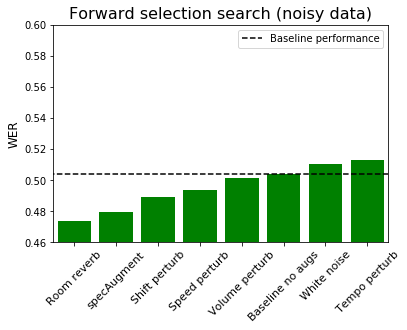

In [28]:
import matplotlib.pyplot as plt

xticks = ["Room reverb",'specAugment',"Shift perturb","Speed perturb","Volume perturb",
            "Baseline no augs","White noise","Tempo perturb"]

plt.title("Forward selection search (noisy data)",fontsize=16)
plt.bar(xticks,for_means_noisy.WER,color="green")
plt.hlines(0.504191,-1,8,linestyles="dashed",label="Baseline performance")
plt.legend()
plt.ylabel("WER",fontsize=12)
plt.xticks(rotation=45,fontsize=11)
plt.ylim(0.46,0.6)
plt.xlim(-0.5,7.5)

plt.show()

### CI for forward

In [29]:
models = df_noisy.Model_id.unique()

for i,m in enumerate(models):
    if i == 0:
        temp = df_noisy[df_noisy.Model_id.isin([m])][["Reference","WER"]]
        temp = temp.rename(columns={"WER":f'{m}'})  
        
        ref_df_noisy= temp.copy()
        
    else:
        temp = df_noisy[df_noisy.Model_id.isin([m])][["Reference","WER"]]
        temp = temp.rename(columns={"WER":m}) 
        
        ref_df_noisy = ref_df_noisy.merge(temp,on=["Reference"])
ref_df_noisy.head(3)

,Reference,AblationNoise_Baseline,AblationNoise_only_tempo_perturb,AblationNoise_only_room_reverb,AblationNoise_only_volume_perturb,AblationNoise_only_add_wn,AblationNoise_only_shift_perturb,AblationNoise_only_spec_augment,AblationNoise_only_speed_perturb,AblationNoise_Baseline_allAugs,AblationNoise_no_tempo_perturb,AblationNoise_no_room_reverb,AblationNoise_no_volume_perturb,AblationNoise_no_add_wn,AblationNoise_no_shift_perturb,AblationNoise_no_spec_augment,AblationNoise_no_speed_perturb
0,psykiske ændringer indtræder hos de fleste eft...,0.681818,0.727273,0.727273,0.772727,0.863636,0.636364,0.636364,0.590909,0.909091,0.818182,0.909091,0.818182,0.772727,0.954545,0.818182,0.954545
1,men samfundet er vel os alle sammen inklusive ...,0.454545,0.636364,0.636364,0.636364,0.636364,0.454545,0.454545,0.272727,0.636364,0.727273,0.636364,0.636364,0.818182,0.636364,0.545455,0.636364
2,forsøget skal forhindre det alt for store fraf...,0.333333,0.583333,0.416667,0.416667,0.333333,0.500000,0.500000,0.333333,0.583333,0.583333,0.500000,0.416667,0.500000,0.500000,0.500000,0.666667


In [30]:
for_ref_df_noisy = ref_df_noisy[forward_models]

for_dif_df_noisy = for_ref_df_noisy.subtract(for_ref_df_noisy["AblationNoise_Baseline"],axis="rows")[forward_models[1:]]

for_dif_df_noisy

,AblationNoise_only_add_wn,AblationNoise_only_room_reverb,AblationNoise_only_shift_perturb,AblationNoise_only_spec_augment,AblationNoise_only_speed_perturb,AblationNoise_only_tempo_perturb,AblationNoise_only_volume_perturb
0,0.181818,0.045455,-0.045455,-0.045455,-0.090909,0.045455,0.090909
1,0.181818,0.181818,0.000000,0.000000,-0.181818,0.181818,0.181818
2,0.000000,0.083333,0.166667,0.166667,0.000000,0.250000,0.083333
3,0.250000,0.000000,0.000000,0.166667,0.083333,0.166667,0.000000
4,-0.272727,0.000000,-0.090909,-0.090909,-0.090909,-0.181818,0.000000
...,...,...,...,...,...,...,...
195,0.166667,0.000000,0.333333,0.166667,0.333333,0.166667,0.000000
196,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,0.000000
197,-0.166667,-0.166667,0.000000,-0.166667,-0.166667,-0.166667,-0.166667
198,0.000000,0.000000,0.285714,0.000000,0.000000,0.285714,0.285714


(array([ 1.,  0.,  4., 17., 38., 81., 42., 11.,  5.,  1.]),
 array([-0.66666667, -0.54285714, -0.41904762, -0.2952381 , -0.17142857,
        -0.04761905,  0.07619048,  0.2       ,  0.32380952,  0.44761905,
         0.57142857]),
 <a list of 10 Patch objects>)

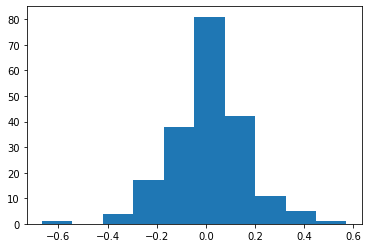

In [31]:
plt.hist(for_dif_df_noisy.AblationNoise_only_add_wn)

In [32]:
m_for_noisy = for_dif_df_noisy.mean()
s_for_noisy = for_dif_df_noisy.std()
n_for_noisy = len(for_dif_df_noisy)


In [33]:
m_for_noisy,s_for_noisy

(AblationNoise_only_add_wn            0.005959
 AblationNoise_only_room_reverb      -0.030295
 AblationNoise_only_shift_perturb    -0.014898
 AblationNoise_only_spec_augment     -0.024747
 AblationNoise_only_speed_perturb    -0.010841
 AblationNoise_only_tempo_perturb     0.008816
 AblationNoise_only_volume_perturb   -0.002996
 dtype: float64,
 AblationNoise_only_add_wn            0.156300
 AblationNoise_only_room_reverb       0.132953
 AblationNoise_only_shift_perturb     0.125232
 AblationNoise_only_spec_augment      0.133233
 AblationNoise_only_speed_perturb     0.127405
 AblationNoise_only_tempo_perturb     0.146751
 AblationNoise_only_volume_perturb    0.113706
 dtype: float64)

In [34]:
from scipy.stats import  t
confidence=0.05

h = t.ppf(1-(confidence/2), n_for_noisy - 1) * (s_for_noisy/(np.sqrt(n_for_noisy)))

start = m_for_noisy - h
end = m_for_noisy + h

start *= 100
end *= 100

CIs_forwards = list(zip(forward_models[1:],start,end))

[print(f'{a}: ({b}) - ({c})') for a,b,c in CIs_forwards]

AblationNoise_only_add_wn: (-1.583483753546665) - (2.7753542259946045)
AblationNoise_only_room_reverb: (-4.88340408168798) - (-1.1756406279210732)
AblationNoise_only_shift_perturb: (-3.2360148633581174) - (0.2564084442914725)
AblationNoise_only_spec_augment: (-4.332519923143082) - (-0.6169630437113348)
AblationNoise_only_speed_perturb: (-2.8606544624040784) - (0.6923737078839252)
AblationNoise_only_tempo_perturb: (-1.1646996208761842) - (2.927843105433385)
AblationNoise_only_volume_perturb: (-1.8851173362998415) - (1.285880311527752)


[None, None, None, None, None, None, None]

## Backward

In [35]:
means_noisy

,WER,CER,Best_epoch
Model_id,,,
AblationNoise_Baseline,0.504191,0.195462,11.300
AblationNoise_Baseline_allAugs,0.562042,0.206855,19.670
AblationNoise_no_add_wn,0.517725,0.198632,18.340
AblationNoise_no_room_reverb,0.561836,0.220457,17.990
AblationNoise_no_shift_perturb,0.552539,0.212756,19.335
AblationNoise_no_spec_augment,0.531265,0.202345,16.350
AblationNoise_no_speed_perturb,0.549993,0.214489,18.995
AblationNoise_no_tempo_perturb,0.525489,0.194501,16.985
AblationNoise_no_volume_perturb,0.550893,0.212449,17.675


In [36]:
backward_models = ['AblationNoise_Baseline_allAugs','AblationNoise_no_add_wn','AblationNoise_no_room_reverb',
                   'AblationNoise_no_shift_perturb','AblationNoise_no_spec_augment','AblationNoise_no_speed_perturb',
                   'AblationNoise_no_tempo_perturb','AblationNoise_no_volume_perturb']

back_means_noisy = means_noisy.loc[backward_models]

back_means_noisy = back_means_noisy.sort_values(by="WER",ascending=False)

round(back_means_noisy*100,2)

,WER,CER,Best_epoch
Model_id,,,
AblationNoise_Baseline_allAugs,56.20,20.69,1967.0
AblationNoise_no_room_reverb,56.18,22.05,1799.0
AblationNoise_no_shift_perturb,55.25,21.28,1933.5
AblationNoise_no_volume_perturb,55.09,21.24,1767.5
AblationNoise_no_speed_perturb,55.00,21.45,1899.5
AblationNoise_no_spec_augment,53.13,20.23,1635.0
AblationNoise_no_tempo_perturb,52.55,19.45,1698.5
AblationNoise_no_add_wn,51.77,19.86,1834.0


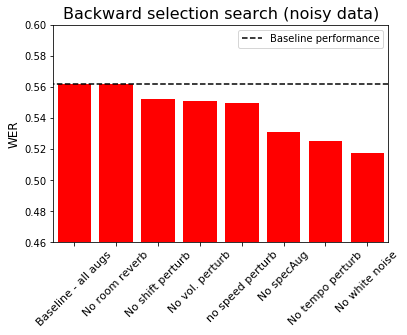

In [37]:
ticks = ["Baseline - all augs",'No room reverb','No shift perturb','No vol. perturb','no speed perturb',
         "No specAug","No tempo perturb","No white noise"]

plt.title("Backward selection search (noisy data)",fontsize=16)
plt.bar(ticks,back_means_noisy.WER,color="red")
plt.hlines(0.562042,-1,8,linestyles="dashed",label="Baseline performance")
plt.legend()
plt.xticks(rotation=45)
plt.ylabel("WER",fontsize=12)
plt.xticks(rotation=45,fontsize=11)
plt.ylim(0.46,0.6)
plt.xlim(-.5,7.5)

plt.show()

### CI for backward

In [38]:
back_ref_df_noisy = ref_df_noisy[backward_models]

back_dif_df_noisy = back_ref_df_noisy.subtract(back_ref_df_noisy["AblationNoise_Baseline_allAugs"],axis="rows")[backward_models[1:]]

back_dif_df_noisy.sample(3)

,AblationNoise_no_add_wn,AblationNoise_no_room_reverb,AblationNoise_no_shift_perturb,AblationNoise_no_spec_augment,AblationNoise_no_speed_perturb,AblationNoise_no_tempo_perturb,AblationNoise_no_volume_perturb
50,0.071429,0.142857,0.071429,0.000000,-0.142857,0.000000,0.000000
71,-0.076923,-0.153846,-0.230769,0.076923,0.000000,-0.307692,-0.153846
194,0.111111,0.222222,0.111111,0.111111,0.111111,0.111111,0.111111


(array([ 2.,  2., 18., 30., 22., 74., 29., 13.,  6.,  4.]),
 array([-0.4 , -0.32, -0.24, -0.16, -0.08,  0.  ,  0.08,  0.16,  0.24,
         0.32,  0.4 ]),
 <a list of 10 Patch objects>)

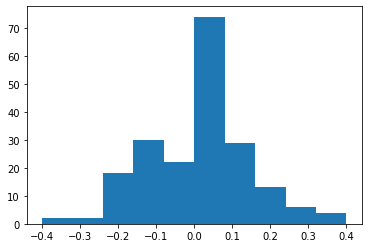

In [39]:
plt.hist(back_dif_df_noisy.AblationNoise_no_room_reverb)

In [40]:
m_back_noisy = back_dif_df_noisy.mean()
s_back_noisy = back_dif_df_noisy.std()
n_back_noisy = len(back_dif_df_noisy)

m_back_noisy


AblationNoise_no_add_wn           -0.044316
AblationNoise_no_room_reverb      -0.000205
AblationNoise_no_shift_perturb    -0.009502
AblationNoise_no_spec_augment     -0.030777
AblationNoise_no_speed_perturb    -0.012048
AblationNoise_no_tempo_perturb    -0.036553
AblationNoise_no_volume_perturb   -0.011149
dtype: float64

In [41]:
from scipy.stats import  t
confidence=0.05

h = t.ppf(1-(confidence/2), n_back_noisy - 1) * (s_back_noisy/(np.sqrt(n_back_noisy)))

start = m_back_noisy - h
end = m_back_noisy + h

start *= 100
end *= 100

CIs_backward = list(zip(backward_models[1:],start,end))

[print(f'{a}: ({b}) - ({c})') for a,b,c in CIs_backward]

AblationNoise_no_add_wn: (-6.397856578763697) - (-2.4653480909253545)
AblationNoise_no_room_reverb: (-1.8702503227175815) - (1.8291865747292801)
AblationNoise_no_shift_perturb: (-2.8622453250191406) - (0.9617479894999311)
AblationNoise_no_spec_augment: (-4.879927811937248) - (-1.2754221543869477)
AblationNoise_no_speed_perturb: (-3.1224228680666726) - (0.7128155541933088)
AblationNoise_no_tempo_perturb: (-5.750499587035635) - (-1.5600504700997635)
AblationNoise_no_volume_perturb: (-3.273093347756547) - (1.0433311532423672)


[None, None, None, None, None, None, None]

# Checking for sentences occuring twice

In [42]:
multiples = pd.DataFrame(df.groupby("Reference").size())

NameError: name 'df' is not defined

In [ ]:
multiples = multiples[multiples[0] == 2]

In [ ]:
for r in multiples.index:
    print(r)
    print(df[df.Reference == r].Filename)

In [ ]:
CIs_backward